In [1]:
import pandas as pd
import textblob as tb
import geopandas as gpd
import matplotlib.pyplot as plt
import regex as re

In [2]:
gdf = gpd.read_file('maps/ne_10m_admin_0_countries_lakes.shp')[['ADMIN','ADM0_A3', 'geometry']].to_crs('+proj=robin')
gdf.sample(5)

,ADMIN,ADM0_A3,geometry
145,Maldives,MDV,(POLYGON ((6911995.929345855 -72921.6714309218...
106,British Indian Ocean Territory,IOT,(POLYGON ((6825451.362672996 -785055.359721292...
125,South Korea,KOR,(POLYGON ((11359699.34508698 3589322.264363511...
242,Saint Vincent and the Grenadines,VCT,(POLYGON ((-5762947.849449636 1346293.24563441...
31,Bermuda,BMU,(POLYGON ((-5832751.701262455 3453540.37685257...


In [3]:
df = pd.read_json('data/simpsonsScript.json').fillna('').T
df.iloc[:2,:3]

,e01,e02,e03
s01,"Ooh! Careful, Homer! There's no time. We're la...","Come on, Mom. Yeah, Mom. Hurry up. All right. ...","Now class, I don't want this field trip to be ..."
s02,"Bart, no more interruptions during Martin's bo...",The capital of North Dakota is named after wha...,"Hello, everyone. You know, Halloween is a stra..."


In [4]:
df['allEpisodes'] = df['e01']
for col in df.columns:
    df['allEpisodes'] += df[col]

In [5]:
words = ' '.join(df['allEpisodes'])
countries = gdf['ADMIN'].tolist()
acronym = {'United States of America':['USA'],
           'United Kingdom':['UK','England'],
           'Russia':['USSR','Soviet Union'],
           'Netherlands':['Holland'],
           'United Arab Emirates':['UAE'],
           'Bosnia and Herzegovina':['Bosnia','Yugoslavia'],
           'Democratic Republic of the Congo':['Congo'],
           'Republic of the Congo':['Congo'],
           'Federated States of Micronesia':['Micronesia'],
           'Hong Kong S.A.R.':['Hong Kong'],
           'Croatia':['Yugoslavia'],
           'Northern Mariana Islands':['Mariana Islands'],
           'Republic of Serbia':['Serbia','Yugoslavia'],
           'United Republic of Tanzania':['Tanzania'],
           'Slovenia':['Yugoslavia'],
           'Slovakia':['Czechoslovakia'],
           'Czechia':['Czechoslovakia']
          }
#['USA','UK','USSR','Soviet Union','Yugoslavia','England','Holland']
for values in acronym.values():
    for value in values:
        if value not in countries:
            countries.append(value)

In [6]:
data={}
for country in countries:
    data[country]=len(re.findall(country, words))

In [7]:
dfcount = pd.DataFrame(list(data.items()), columns=['ADMIN','mentions'])
for key,values in acronym.items():
    for value in values:
        dfcount.loc[dfcount[dfcount['ADMIN']==key].index,'mentions'] += dfcount[dfcount['ADMIN']==value]['mentions'].values
for key,values in acronym.items():
    for value in values:
        dfcount.drop(dfcount[dfcount['ADMIN']==value].index, inplace=True)

In [8]:
merged = gdf.merge(dfcount,on='ADMIN')
merged.describe()

,mentions
count,255.000000
mean,9.278431
std,25.968730
min,0.000000
25%,0.000000
50%,0.000000
75%,6.000000
max,212.000000


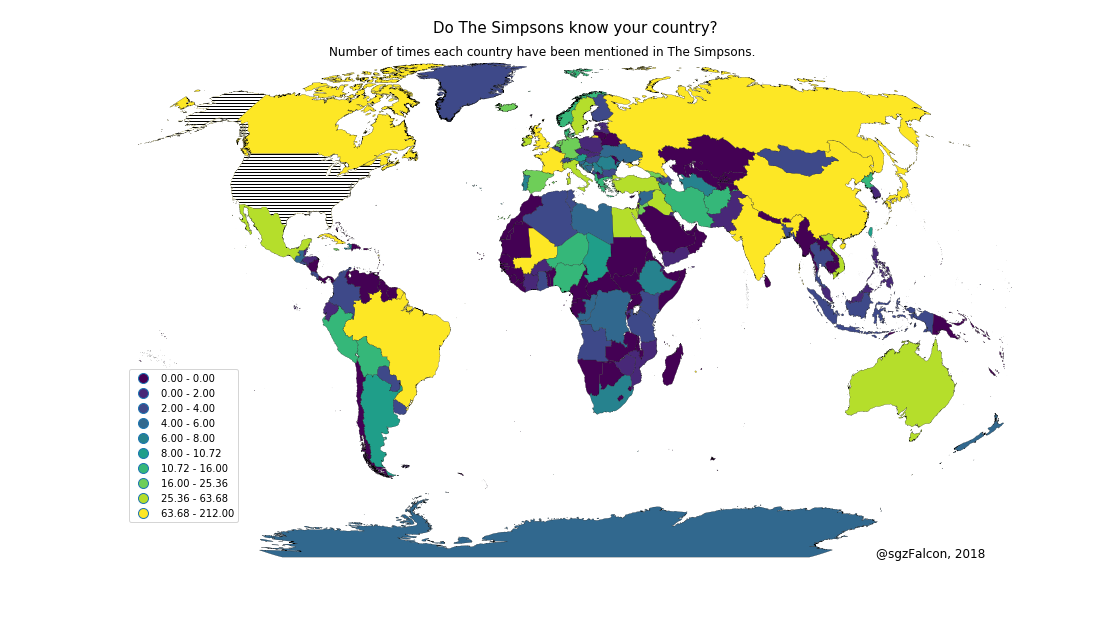

In [16]:
ax = merged.plot(column='mentions', cmap='viridis', figsize=(16, 10), scheme='quantiles', k=25, legend=True, linewidth=0.2,edgecolor='black')
merged[merged['ADMIN']=='United States of America'].plot(ax=ax, color='white',hatch='----')

title='Do The Simpsons know your country?'
description=('Number of times each country have been mentioned in The Simpsons.')
author='@sgzFalcon, 2018'
ax.set_title(title, fontdict={'fontsize': 15}, loc='center')
ax.annotate(description, xy=(0.3, 0.91), size=12, xycoords='figure fraction')
ax.annotate(author, xy=(0.8, 0.1), size=12, xycoords='figure fraction')

ax.set_axis_off()
ax.set_xlim([-1.4e7, 1.6e7])
ax.get_legend().set_bbox_to_anchor((.12, .4))
fig1 = ax.get_figure()

fig1.savefig('mapSimpsons.png', dpi=500)

In [186]:
#dfcount[dfcount['mentions']>20].sort_values(by='mentions',ascending=False)